# Credit Card Fraud Detection - Classification model 

In [1]:
# Import important libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# importing a Dataset

df = pd.read_csv("creditcard.csv")

In [3]:
# Lookiing at the first 5 row of the dataset
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df["Time"]

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [5]:
df["Class"].unique()

array([0, 1])

In [6]:
# Looking for the missing values inn the dataset

df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# looking at the information of the DataFrameof 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Analysis 

<function matplotlib.pyplot.show(close=None, block=None)>

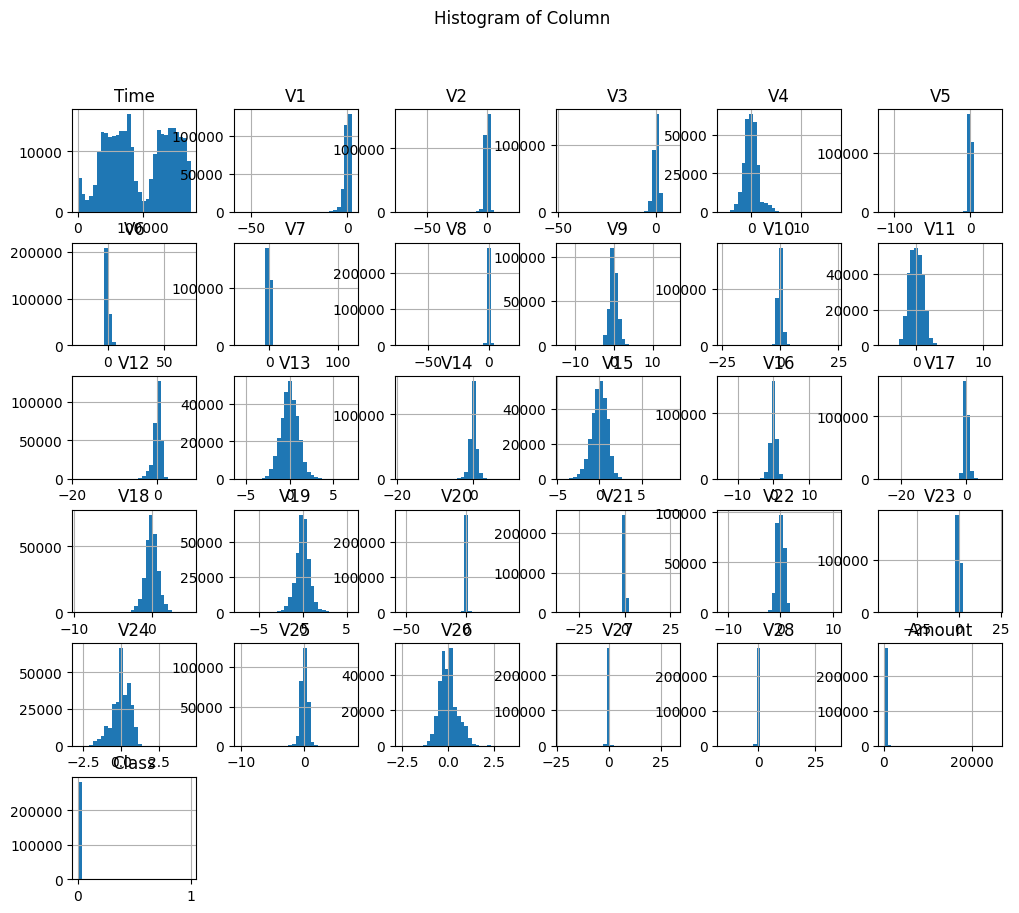

In [10]:
df.hist(bins=30, figsize=(12,10), grid = True)
plt.suptitle("Histogram of Column")
plt.show

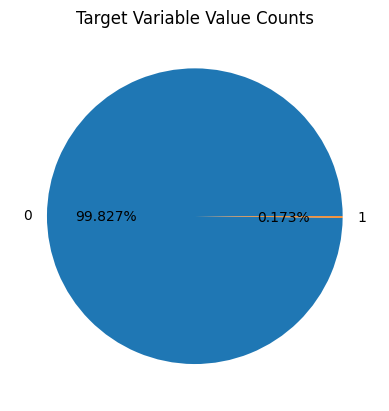

Class
0    284315
1       492
Name: count, dtype: int64
Only about 0.173% of transactions are fraudulent, showing significant class imbalance.


In [11]:
label = df["Class"].unique()
size = df.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(size, labels=label, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()
print(df.Class.value_counts())
print("Only about 0.173% of transactions are fraudulent, showing significant class imbalance.")

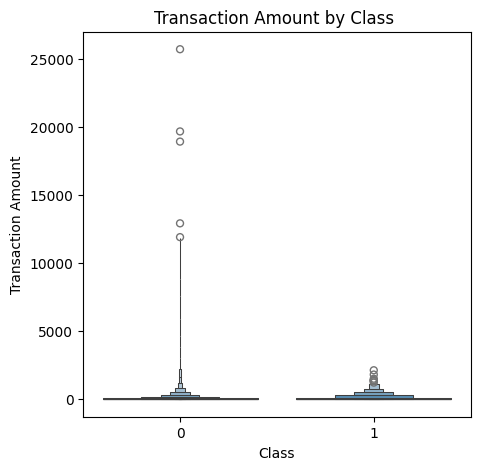

In [12]:
plt.figure(figsize= (5, 5))
sns.boxenplot( x='Class', y="Amount", data=df)
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

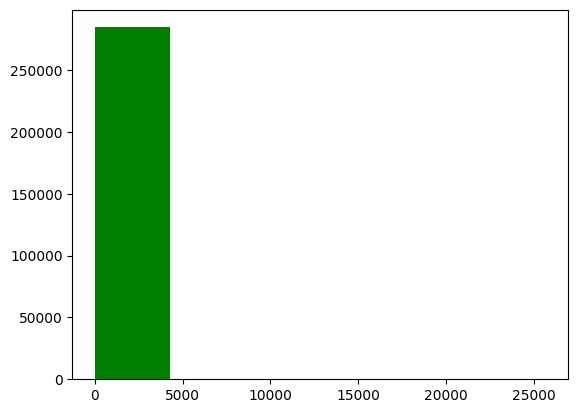

In [13]:
plt.hist(df.Amount.values, 6, histtype='barstacked', facecolor='g')
plt.show()

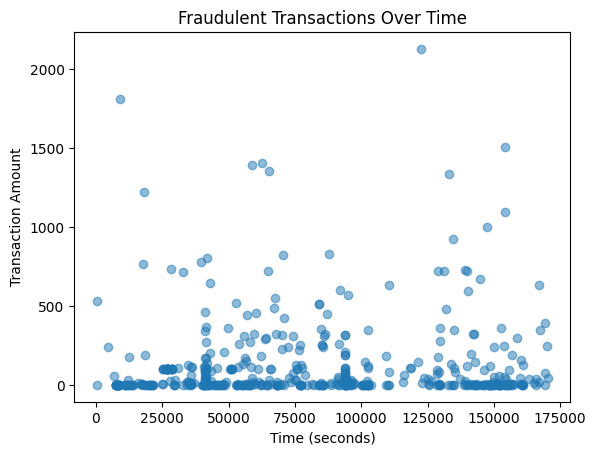

In [14]:
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()



# Data Preprocessing

In [15]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [16]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [17]:
X.shape

(284807, 30)

In [18]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#  Spliting the taining set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit(X_test)

StandardScaler()

In [21]:
X_train

array([[ 1.30747000e+05,  2.04716304e+00,  1.07986610e-01, ...,
        -8.50246556e-02, -8.42920007e-02,  7.70000000e-01],
       [ 8.13440000e+04,  1.28240449e+00,  4.59864448e-01, ...,
        -1.01678633e-02, -5.33248686e-03,  1.79000000e+00],
       [ 1.59004000e+05, -4.14862511e-01,  1.20257796e-02, ...,
         2.37627707e-01,  2.04342556e-01,  5.95000000e+00],
       ...,
       [ 7.66160000e+04,  1.51260229e+00, -9.49435315e-01, ...,
        -1.41537086e-03,  3.66494418e-03,  3.49000000e+01],
       [ 9.72530000e+04,  1.79886333e+00, -1.69979073e+00, ...,
        -3.36155803e-02, -3.24705125e-02,  1.71310000e+02],
       [ 7.48870000e+04, -5.89399721e-01,  7.47828393e-01, ...,
         8.65917860e-02,  1.18083774e-01,  1.59900000e+01]])

In [22]:
X_test

array([[ 1.25821000e+05, -3.23333572e-01,  1.05745525e+00, ...,
         1.08494430e-01,  1.61139167e-01,  4.00000000e+01],
       [ 1.57235000e+05, -3.49718405e-01,  9.32618570e-01, ...,
         7.68300272e-02,  1.75561960e-01,  1.98000000e+00],
       [ 1.52471000e+05, -1.61471082e+00, -2.40656973e+00, ...,
         2.86285101e-01,  4.37321868e-01,  9.60000000e+01],
       ...,
       [ 5.74810000e+04,  1.40322087e+00, -4.39300461e-01, ...,
        -1.04050698e-02,  6.48925492e-03,  1.00000000e+01],
       [ 1.53018000e+05, -3.23131065e+00,  2.10313977e+00, ...,
         4.72312731e-01, -1.92528808e-01,  9.99900000e+01],
       [ 4.03190000e+04,  1.25756139e+00, -7.24477151e-01, ...,
        -1.01754487e-01,  1.19557412e-02,  9.00000000e+01]])

In [23]:
# from sklearn.kernel_approximation import Nystroem
# from sklearn.decomposition import PCA

# # Approximate the kernel
# # nystroem = Nystroem(kernel='rbf', n_components=300)  # Adjust `n_components`
# # X_train = nystroem.fit_transform(X_train)
# # X_test = nystroem.transform(X_test)

# # Apply PCA on the approximated data
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)




# Apply model Implentation Logistic Regression, SVC ,  DecisionTreeClassifier model

In [24]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy = dt_model.score(X_test, y_test)
print("DecisionTreeClassifier Accuracy: {0:.5f}".format(accuracy))

DecisionTreeClassifier Accuracy: 0.99945


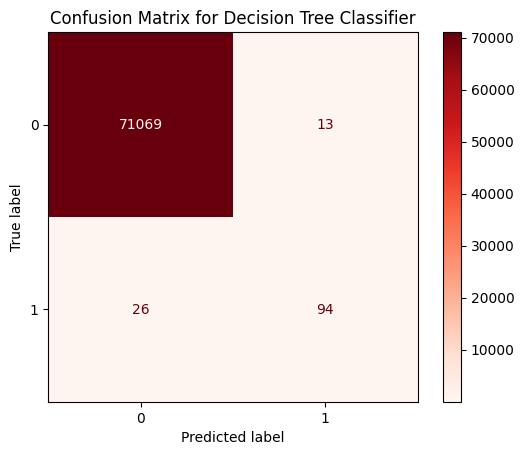

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

#  Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= 2)
lr.fit(X_train, y_train)
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy = dt_model.score(X_test, y_test)
print("Logistic Regression Accuracy: {0:.5f}".format(accuracy))

Logistic Regression Accuracy: 0.99945


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


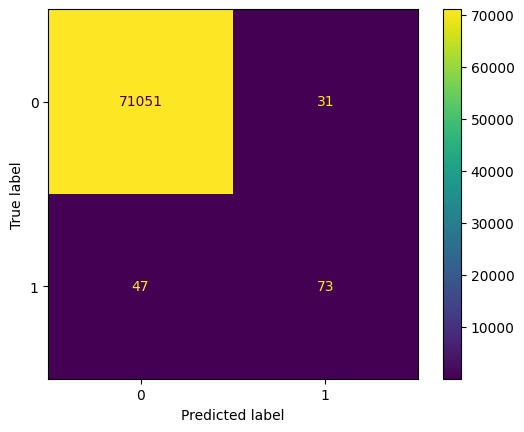

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm
_ = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

# Support Vector Classification

In [28]:
from sklearn.svm import SVC
model = SVC(kernel= "rbf", random_state= 0)
model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy = dt_model.score(X_test, y_test)
print("Kernal SVM: {0:.5f}".format(accuracy))

Kernal SVM: 0.99945


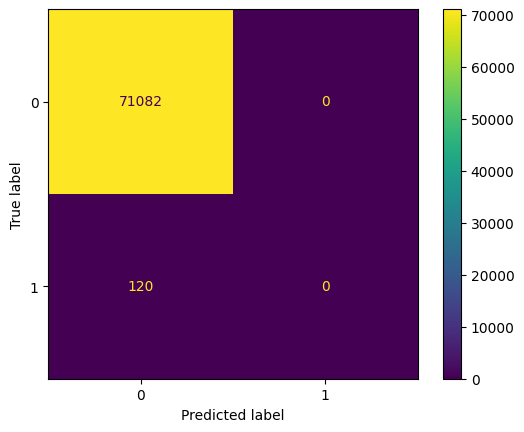

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [30]:
from sklearn.model_selection import cross_val_score
sccore_1 = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)
print("Accuracy: {:2f} %".format(sccore_1.mean()*100))
print("Standard Deivation: {:2f} %".format(sccore_1.std()*100))

Accuracy: 99.825847 %
Standard Deivation: 0.001871 %
